In [134]:
import numpy as np
import matplotlib.pyplot as plt

In [135]:
data = np.genfromtxt("./datasets/multivariate_regression.txt", delimiter=",")
data[:5, ]

array([[2.104e+03, 3.000e+00, 3.999e+05],
       [1.600e+03, 3.000e+00, 3.299e+05],
       [2.400e+03, 3.000e+00, 3.690e+05],
       [1.416e+03, 2.000e+00, 2.320e+05],
       [3.000e+03, 4.000e+00, 5.399e+05]])

In [136]:
x = data[:, :2]
y = data[:, 2]

# Normalisation des données

In [137]:
def normalize(array):
    return (array - np.mean(array)) / np.std(array)

In [138]:
x = normalize(x)
x[:5, :]

array([[ 0.96415008, -0.87391021],
       [ 0.52322557, -0.87391021],
       [ 1.22310574, -0.87391021],
       [ 0.36225314, -0.87478506],
       [ 1.74801587, -0.87303536]])

In [139]:
x1 = x[:, 0]
x2 = x[:, 1]

In [140]:
# Visualisation
from plotly import express as px
fig = px.scatter_3d(x=x1, y=x2, z=y)
fig.show()

In [141]:
x1 = x1.reshape((x.shape[0], 1))
x2 = x2.reshape((x.shape[0], 1))
y = y.reshape((x.shape[0], 1))
print(x1.shape)
print(x2.shape)
print(y.shape)

(47, 1)
(47, 1)
(47, 1)


# Régression pénalisée

In [142]:
X = np.hstack((x1, x2, np.ones((x.shape[0], 1)) ))
X[:5, ]

array([[ 0.96415008, -0.87391021,  1.        ],
       [ 0.52322557, -0.87391021,  1.        ],
       [ 1.22310574, -0.87391021,  1.        ],
       [ 0.36225314, -0.87478506,  1.        ],
       [ 1.74801587, -0.87303536,  1.        ]])

In [143]:
theta = np.random.randn(3, 1)
print(theta)

[[ 0.64347524]
 [ 0.79863352]
 [-0.44546951]]


# Modèle

In [144]:
def model(X_, theta_):
    return X_.dot(theta_)

In [145]:
model(X, theta)[:5, ]

array([[-0.52299679],
       [-0.80672079],
       [-0.35636523],
       [-0.91100126],
       [-0.01789988]])

# Fonction coût

In [146]:
def cost_function(X_, theta_, y_, regulation_rate, penalty=None, alpha_=0.5):
    m = len(y_)
    if penalty=="l1" or penalty is None:
        return (1/2*m) * (np.sum((model(X_, theta_) - y_)**2) + regulation_rate * np.sum(abs(theta_)))
    if penalty=="l2":
        return (1/2*m) * (np.sum((model(X_, theta_) - y_)**2) + regulation_rate * np.sum(theta_**2))
    if penalty=="elasticnet":
        return (1/2*m) * (np.sum((model(X_, theta_) - y_)**2) + regulation_rate * (alpha_*np.sum(abs(theta_)) + (1-alpha_/2)*np.sum(theta_**2)))

# Gradient & Descente de Gradient

In [147]:
def grad(X_, theta_, y_):
    m = len(y_)
    return 1/m * X_.transpose().dot(model(X_, theta_) - y_)

In [148]:
def descent_grad(
        X_,
        theta_,
        y_,
        learning_rate_,
        n_iterations_,
        regulation_rate_,
        penalty_=None,
        alpha_=0.5
):

    cost_history_ = np.zeros(n_iterations_)
    for i in range(0, n_iterations_):
        theta_ = theta_ - (learning_rate_ * grad(X_, theta_, y_))
        cost_history_[i] = cost_function(X_, theta_, y_, regulation_rate=regulation_rate_, penalty=penalty_, alpha_=alpha_)
    return theta_, cost_history_

# Entraînement du modèle

In [172]:
regulation_param = 0.8
norm = "l2"
cost_function(X, theta, y, regulation_param, norm)

np.float64(144892063227131.2)

In [173]:
learning_rate = 0.01
n_iterations = 1000
theta_final, cost_history = descent_grad(X, theta, y, learning_rate, n_iterations, regulation_param, norm)
theta_final

array([[ 153003.65032729],
       [-102505.30717297],
       [ 117312.76480806]])

In [174]:
pred = model(X, theta_final)
pred[:5, ]

array([[354411.68119348],
       [286948.62226741],
       [394032.84278498],
       [262408.92833789],
       [474256.33138364]])

# Évaluation du modèle

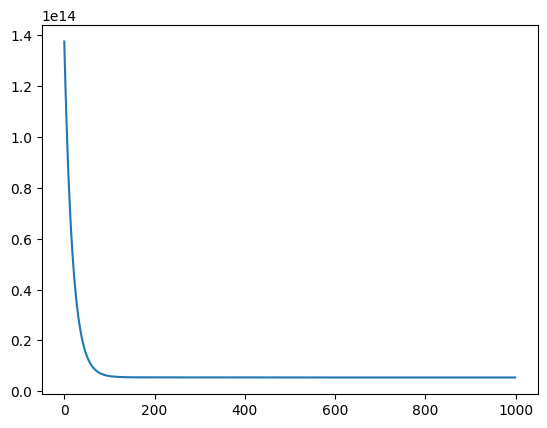

In [175]:
plt.plot(range(n_iterations), cost_history)
plt.show()

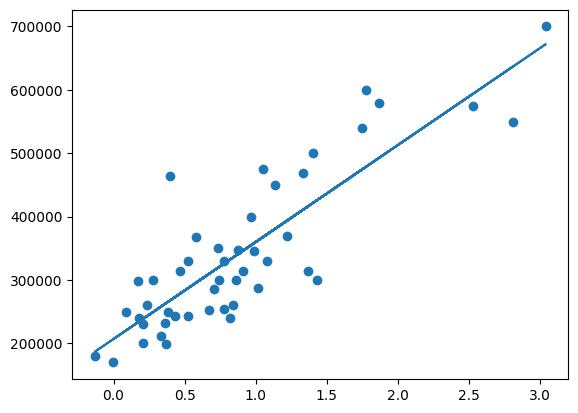

In [176]:
plt.scatter(x1, y)
plt.plot(x1, pred)
plt.show()

# Coéfficient de détermination R²

In [177]:
def coef_determination(y_, pred_):
    u = np.sum((y_ - pred_) ** 2)
    v = np.sum((y_ - y_.mean()) ** 2)
    return 1 - u / v

In [178]:
coef_determination(y, pred)

np.float64(0.7310210464254953)